In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import iqplot

import bokeh.io
import bokeh.models
import bokeh.plotting

bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
Data = pd.read_csv('/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/MultiSensory_Project/GatedArenas_Agar/Results/DataSet.csv')
Data.head()

,Unnamed: 0,Date,Training,Starvation,Relative Time Left,Relative Time Right,Relative Time far Left,Relative Time far Right,Reinforced_side,Peeks Left,Peeks Right,Peeks Top,Face Left,Face Right,Face Top,Long Peeks Left,Long Peeks Right,Long Peeks Top
0,0,22-03-10,Trained,Overnight no Water,0.445191,0.554809,0.229559,0.274985,Right,1.0,0.0,3.0,5.0,8.0,8.0,0.0,0.0,2.0
1,0,22-03-10,Trained,Overnight no Water,0.458867,0.541133,0.247927,0.191526,Left,1.0,1.0,3.0,6.0,5.0,6.0,0.0,1.0,3.0
2,0,22-03-10,Trained,Overnight no Water,0.508440,0.491560,0.416981,0.396896,Left,3.0,5.0,1.0,0.0,3.0,0.0,1.0,4.0,0.0
3,0,22-03-10,Trained,Overnight no Water,0.687568,0.312432,0.242062,0.188678,Right,0.0,1.0,3.0,8.0,3.0,7.0,0.0,1.0,3.0
4,0,22-03-10,Trained,Not starved,0.449296,0.550704,0.252304,0.298756,Right,1.0,2.0,0.0,3.0,5.0,5.0,1.0,1.0,0.0


In [14]:
#Data['Face Right']

Data_nostarve = Data[((Data['Training'] == 'Trained') & (Data['Starvation'] == 'Not starved')) | (Data['Training'] == 'Ctrl') ]
Data_nostarve.head()

,Unnamed: 0,Date,Training,Starvation,Relative Time Left,Relative Time Right,Relative Time far Left,Relative Time far Right,Reinforced_side,Peeks Left,Peeks Right,Peeks Top,Face Left,Face Right,Face Top,Long Peeks Left,Long Peeks Right,Long Peeks Top
4,0,22-03-10,Trained,Not starved,0.449296,0.550704,0.252304,0.298756,Right,1.0,2.0,0.0,3.0,5.0,5.0,1.0,1.0,0.0
5,0,22-03-10,Trained,Not starved,0.472355,0.527645,0.328391,0.315888,Left,0.0,0.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0
6,0,22-03-10,Trained,Not starved,0.662436,0.337564,0.358842,0.182018,Left,4.0,1.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0
7,0,22-03-10,Trained,Not starved,0.593114,0.406886,0.291531,0.218271,Right,1.0,1.0,0.0,8.0,5.0,4.0,0.0,1.0,0.0
8,0,22-03-10,Ctrl,Overnight no Water,0.461967,0.538033,0.315720,0.398278,Right,1.0,1.0,0.0,7.0,7.0,6.0,0.0,1.0,0.0


In [15]:
#AutoData.columns=AutoData.columns.droplevel(0)
Melted = pd.melt(Data_nostarve,
                 id_vars=['Training', 'Starvation','Reinforced_side'],
                 value_name = 'Count',
                 value_vars=['Peeks Left', 'Peeks Right', 'Peeks Top', 'Long Peeks Left', 'Long Peeks Right', 'Long Peeks Top','Face Left', 'Face Right', 'Face Top'],
                 var_name='Type')

In [16]:
Melted

,Training,Starvation,Reinforced_side,Type,Count
0,Trained,Not starved,Right,Peeks Left,1.0
1,Trained,Not starved,Left,Peeks Left,0.0
2,Trained,Not starved,Left,Peeks Left,4.0
3,Trained,Not starved,Right,Peeks Left,1.0
4,Ctrl,Overnight no Water,Right,Peeks Left,1.0
...,...,...,...,...,...
139,Ctrl,Overnight no Water,Left,Face Top,10.0
140,Trained,Not starved,Right,Face Top,0.0
141,Trained,Not starved,Left,Face Top,0.0
142,Trained,Not starved,Right,Face Top,3.0


In [17]:
conditions = [
    (Melted['Type'].str.contains('Long')),
    (Melted['Type'].str.contains('Face')),
    (('Long' not in Melted['Type']) & ('Face' not in Melted['Type'])) # This is not really working but still gives expected result
]

values = ['Squeeze', 'Fronts', 'Peeks']
Melted['Beh'] = np.select(conditions,values)
Melted.head()

,Training,Starvation,Reinforced_side,Type,Count,Beh
0,Trained,Not starved,Right,Peeks Left,1.0,Peeks
1,Trained,Not starved,Left,Peeks Left,0.0,Peeks
2,Trained,Not starved,Left,Peeks Left,4.0,Peeks
3,Trained,Not starved,Right,Peeks Left,1.0,Peeks
4,Ctrl,Overnight no Water,Right,Peeks Left,1.0,Peeks


In [18]:
conditions = [
    (Melted['Reinforced_side'].str.contains('Right') & (Melted['Type'].str.contains('Right'))),
    (Melted['Reinforced_side'].str.contains('Left') & (Melted['Type'].str.contains('Left'))),
    (Melted['Reinforced_side'].str.contains('Right') & (Melted['Type'].str.contains('Left'))),
    (Melted['Reinforced_side'].str.contains('Left') & (Melted['Type'].str.contains('Right'))),
    (Melted['Type'].str.contains('Top')),
]

values = ['Rewarded Side', 'Rewarded Side', 'Punished Side', 'Punished Side', 'Empty Side']
Melted['Condition'] = np.select(conditions,values)
Melted.head()

,Training,Starvation,Reinforced_side,Type,Count,Beh,Condition
0,Trained,Not starved,Right,Peeks Left,1.0,Peeks,Punished Side
1,Trained,Not starved,Left,Peeks Left,0.0,Peeks,Rewarded Side
2,Trained,Not starved,Left,Peeks Left,4.0,Peeks,Rewarded Side
3,Trained,Not starved,Right,Peeks Left,1.0,Peeks,Punished Side
4,Ctrl,Overnight no Water,Right,Peeks Left,1.0,Peeks,Punished Side


In [19]:
conditions = [
    (Melted['Training'].str.contains('Trained') & (Melted['Starvation'].str.contains('Overnight'))),
    (Melted['Training'].str.contains('Trained') & (Melted['Starvation'].str.contains('Not'))),
    (Melted['Training'].str.contains('Ctrl') & (Melted['Starvation'].str.contains('Overnight'))),
    (Melted['Training'].str.contains('Ctrl') & (Melted['Starvation'].str.contains('Not'))),

]

values = ['Trained Starved', 'Trained', 'Control Starved', 'Control']
Melted['Training_State'] = np.select(conditions,values)
Melted.head()

,Training,Starvation,Reinforced_side,Type,Count,Beh,Condition,Training_State
0,Trained,Not starved,Right,Peeks Left,1.0,Peeks,Punished Side,Trained
1,Trained,Not starved,Left,Peeks Left,0.0,Peeks,Rewarded Side,Trained
2,Trained,Not starved,Left,Peeks Left,4.0,Peeks,Rewarded Side,Trained
3,Trained,Not starved,Right,Peeks Left,1.0,Peeks,Punished Side,Trained
4,Ctrl,Overnight no Water,Right,Peeks Left,1.0,Peeks,Punished Side,Control Starved


<function matplotlib.pyplot.show(close=None, block=None)>

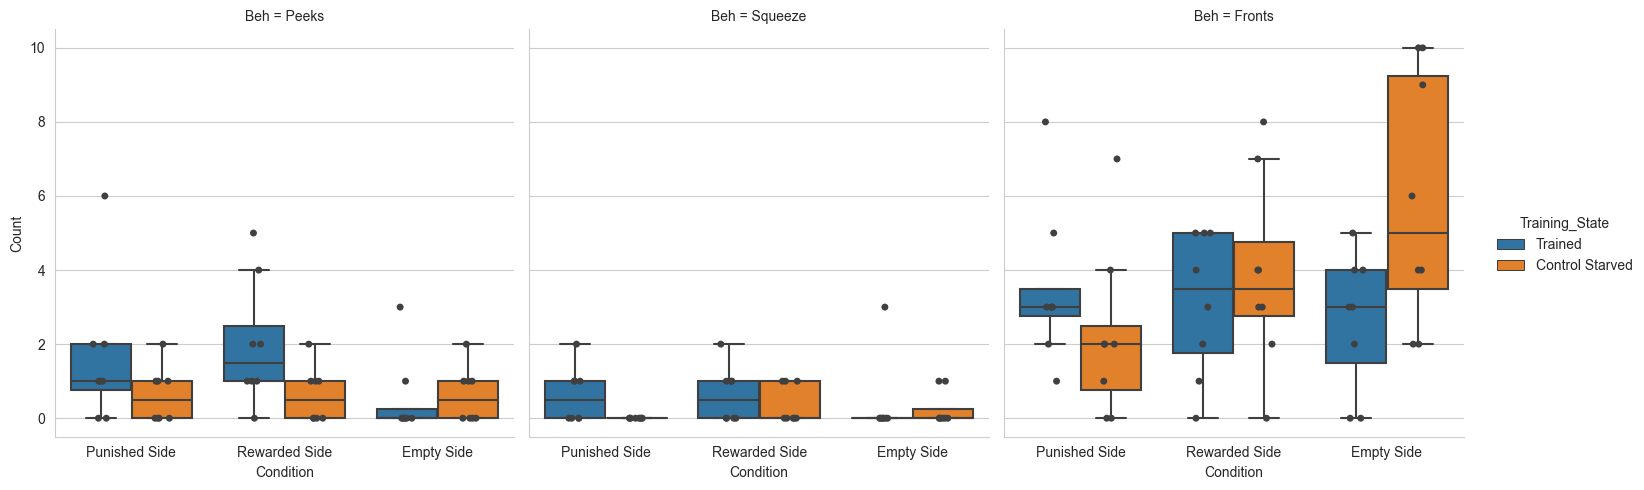

In [20]:
g=sns.catplot(x='Condition', y = 'Count',
            hue='Training_State', showfliers = False,
            col='Beh',
            kind="box",
            #row='Starvation',
            data= Melted)
g.map_dataframe(sns.stripplot,x='Condition', y = 'Count',
            hue='Training_State', dodge=True,
            palette=["#404040"])
plt.show

In [23]:
Melted.Training_State = pd.Categorical(Melted.Training_State,
                                        categories=['Control Starved', 'Trained', ],
                                        ordered=True)

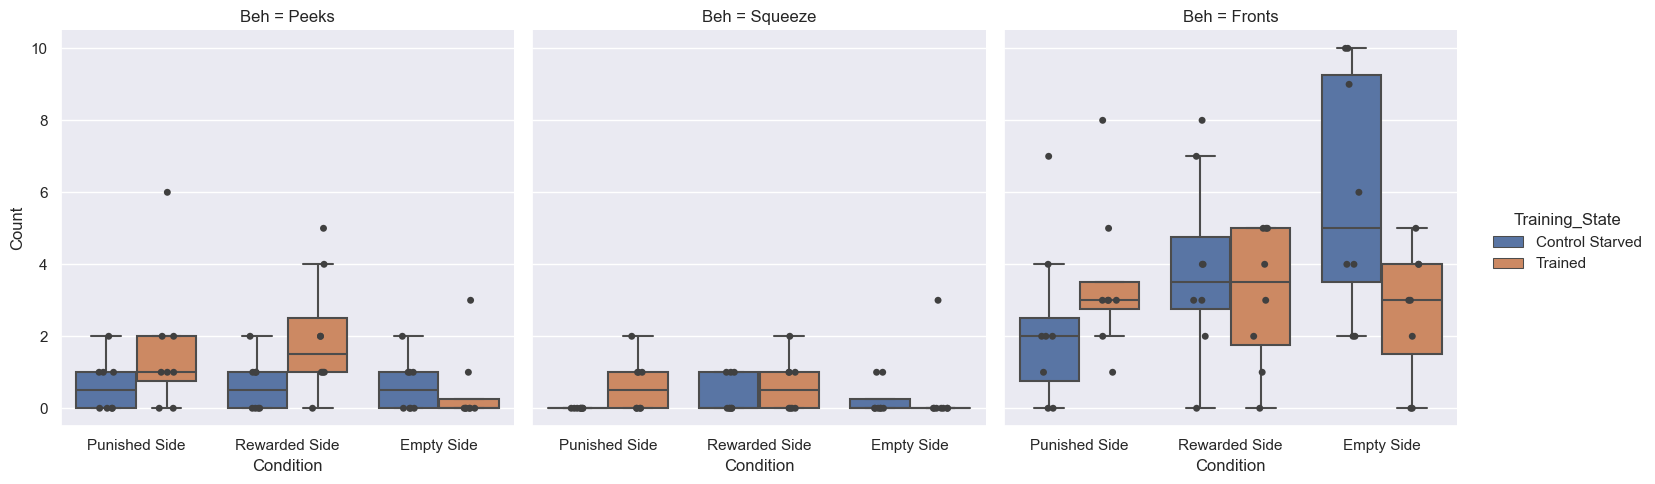

In [24]:
sns.set(font_scale=1)
g=sns.catplot(x='Condition', y = 'Count',
            hue='Training_State', showfliers = False,
            col='Beh',
            kind="box",
            #row='Starvation',
            data= Melted)
g.map_dataframe(sns.stripplot,x='Condition', y = 'Count',
            hue='Training_State', dodge=True,
            palette=["#404040"])
plt.show

plt.savefig('/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/MultiSensory_Project/GatedArenas_Agar/Results/Plots/220722_BehaviorPlot.png')

In [ ]:
x = 'Condition'
y = 'Count'
p = bokeh.plotting.figure(
    frame_width=400,
    frame_height=300,
    x_axis_label=x,
    y_axis_label=y,
)

p.box

In [ ]:


p = iqplot.box(
    data=Data,
    q="Count",
    cats="Condition",
)

bokeh.io.show(p)


In [17]:
for behaviours in np.unique(Melted.Beh):

    print (behaviours)

    p = iqplot.ecdf(
        data=Melted[Melted.Beh == behaviours],
        q='Count',
        style='staircase',
        cats='Training_State',
        #show_legend=False,
        conf_int= True,
    )

    bokeh.io.show(p)

Fronts


Peeks


Squeeze


In [48]:
Grouped = Melted.groupby(Melted.Beh)

In [16]:
for behaviours in np.unique(Melted.Beh):

    print (behaviours)
    p = iqplot.stripbox(
        data=Melted[Melted.Beh == behaviours],
        q='Count',
        #style='staircase',
        cats='Training_State',
        #show_legend=False,
        box_kwargs=dict(line_width=2),
        whisker_kwargs=dict(line_width=2),
        jitter= True,

    )

    bokeh.io.show(p)

Fronts


Peeks


Squeeze


In [50]:
np.unique(Melted.Beh)

array(['Fronts', 'Peeks', 'Squeeze'], dtype=object)

In [3]:
Data['Peekings_Left'] = sum(1 for i in Data['Durations_Corner_Left'] if i > param)

KeyError: 'Durations_Corner_Left'